In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Chèn thư viện

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.layers import Dense
from keras.preprocessing import image



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
brain_df = pd.read_csv('/content/drive/MyDrive/Brain Tumor.csv',usecols=[0,1])
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


## Hiểu sâu hơn về tập dữ liệu của chúng tôi

## Kiểm tra xem có bất kỳ giá trị null nào hay không

In [ ]:
brain_df.isna().sum()

Image    0
Class    0
dtype: int64

### Kiểm tra sự mất cân bằng hay không

## chúng ta có thể giải quyết nó sau này bằng cách thực hiện tăng cường dữ liệu

In [ ]:
brain_df['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


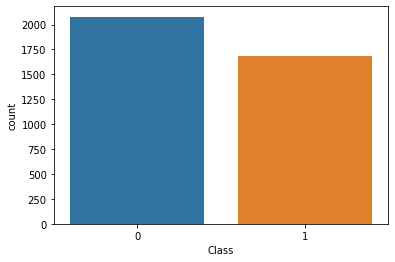

In [ ]:
#plot the value count
sns.countplot(brain_df['Class'])

## Get our data ready!!

In [ ]:
path_list = []
base_path = '/content/drive/MyDrive/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [ ]:
#create path dictonary and then map itto brain_df['pathes']
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [ ]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...


## In một số mẫu trong dữ liệu

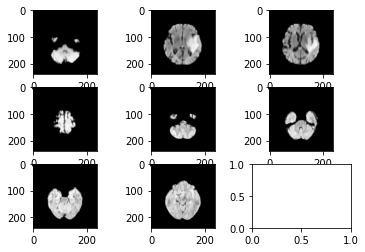

In [ ]:

for x in range (0 ,9):
    img = imread(brain_df['pathes'][x])
    plt.imshow(img)
    plt.subplot(3,3,x+1)

In [ ]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))


In [ ]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/drive/MyDrive/Brain Tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


## xử lý trước tập dữ liệu của chúng tôi trước khi sử dụng MobileNet

In [ ]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.mobilenet_v2.preprocess_input(img_array))
    
# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [ ]:
# get the class label as np.array
y = np.array(brain_df.Class)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Tách tập dữ liệu thành tập huấn luyện (80%) và tập thử nghiệm (20%)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


## Xây dựng mô hình (MobileNet)

In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.9 MB/s 


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
num_classes = 1
model = Sequential()
model.add(MobileNetV2(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 preds (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 7.4 MB/s 


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


# mock-train the model 
model.fit(
    X_train[:,:,:,:],
    y_train[:],
    epochs=110,
    verbose=1,
    validation_data=(X_test[:,:,:,:], y_test[:])
)
model.save("model_brain.h5")
print("Saved model to disk")

Epoch 1/110


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


95/95 [==============================] - 149s 1s/step - loss: 0.4641 - accuracy: 0.8242 - val_loss: 0.4759 - val_accuracy: 0.8088
Epoch 2/110
95/95 [==============================] - 95s 999ms/step - loss: 0.4335 - accuracy: 0.8375 - val_loss: 0.4437 - val_accuracy: 0.8088
Epoch 3/110
95/95 [==============================] - 94s 989ms/step - loss: 0.4118 - accuracy: 0.8504 - val_loss: 0.4248 - val_accuracy: 0.8313
Epoch 4/110
95/95 [==============================] - 95s 1s/step - loss: 0.3956 - accuracy: 0.8524 - val_loss: 0.4116 - val_accuracy: 0.8260
Epoch 5/110
95/95 [==============================] - 94s 990ms/step - loss: 0.3818 - accuracy: 0.8578 - val_loss: 0.4035 - val_accuracy: 0.8340
Epoch 6/110
95/95 [==============================] - 92s 975ms/step - loss: 0.3705 - accuracy: 0.8624 - val_loss: 0.3965 - val_accuracy: 0.8327
Epoch 7/110
95/95 [==============================] - 91s 964ms/step - loss: 0.3617 - accuracy: 0.8654 - val_loss: 0.3847 - val_accuracy: 0.8367
Epoch 8/1

In [ ]:
pretrained_cnn = keras.models.load_model('./model_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 26s 972ms/step - loss: 0.2681 - accuracy: 0.8951
Eval loss: 0.2680949866771698
Eval accuracy: 0.8950863480567932


In [ ]:
y_pred = pretrained_cnn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
y_pred = y_pred.flatten()
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)


{'No Tumor': {'f1-score': 0.9021065675340768,
  'precision': 0.8943488943488943,
  'recall': 0.91,
  'support': 400},
 'Tumor': {'f1-score': 0.8869814020028611,
  'precision': 0.8959537572254336,
  'recall': 0.8781869688385269,
  'support': 353},
 'accuracy': 0.8950863213811421,
 'macro avg': {'f1-score': 0.894543984768469,
  'precision': 0.8951513257871639,
  'recall': 0.8940934844192634,
  'support': 753},
 'weighted avg': {'f1-score': 0.8950160184869066,
  'precision': 0.8951012404251472,
  'recall': 0.8950863213811421,
  'support': 753}}

### Chỉ có 81 hình ảnh trong số 753 hình ảnh thử nghiệm bị phân loại sai

In [ ]:
confusion_matrix(y_test , y_pred ) 

array([[364,  36],
       [ 43, 310]])

# Tumor or Non Tumor Prediction Using KNN

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bt_dataset_t3.csv')
df.replace(to_replace='None', value=pd.np.nan, inplace=True)
pd.options.display.max_columns=None
pd.options.display.max_rows=None
print(df.shape)
df.head()

(1644, 19)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


# Data Preprocessing

In [ ]:
y = df['Target']
X = df.drop(['Image', 'Target'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan) # Replacing inf values with NaN

In [ ]:
def process_na_columns(df, tolerance=0.3):
    '''
    df: dataset except the target
    tolerance: We drop a column if it has lower valid data than tolerance 
    '''
    dataset_size = df.shape[0]
    tolerate_na_size = int(dataset_size * tolerance)  
    for c in df.columns:
        na_counts = df[c].isna().sum()
        
        if na_counts != 0:
            if na_counts > tolerate_na_size:
                df = df.drop([c], axis=1)
            else:
                if df[c].dtypes == 'object':
                    values = df[c].value_counts()
                    max_val = values.index[0] # Highest Occurrence
                    df[c].replace(to_replace=pd.np.nan, value=max_val, inplace=True)
                else:
                    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                    data = df[c].values.reshape(-1, 1)
                    imputed_values = imputer.fit_transform(data)
                    df[c] = imputed_values
    return df

In [ ]:
X = process_na_columns(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)

In [ ]:
print("Score:", score*100, "%")

Score: 93.9209726443769 %
